In [1]:
#Installing my libraries 
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense


In [2]:
df = pd.read_csv('../data/bankloan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df['LoanAmount'].isna().sum()# because i noticed there was NaN in the LoanAmount column

22

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.shape

(614, 13)

since we have 614 rows.. then removing just a couple 50 rows should be okay.. because we want to get clean data right??

In [7]:
df = df.dropna()
df.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

We have successfully cleared all our NaN values
Let's check our shape now

In [8]:
df.shape

(480, 13)

We dropped a number of rows.. but that should not harm our models as much

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [10]:
df = df.drop('Loan_ID', axis=1) #We dont need IDs when building our models
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status']) #We want to know if our dataset is imbalanced

Counter({'Y': 332, 'N': 148})

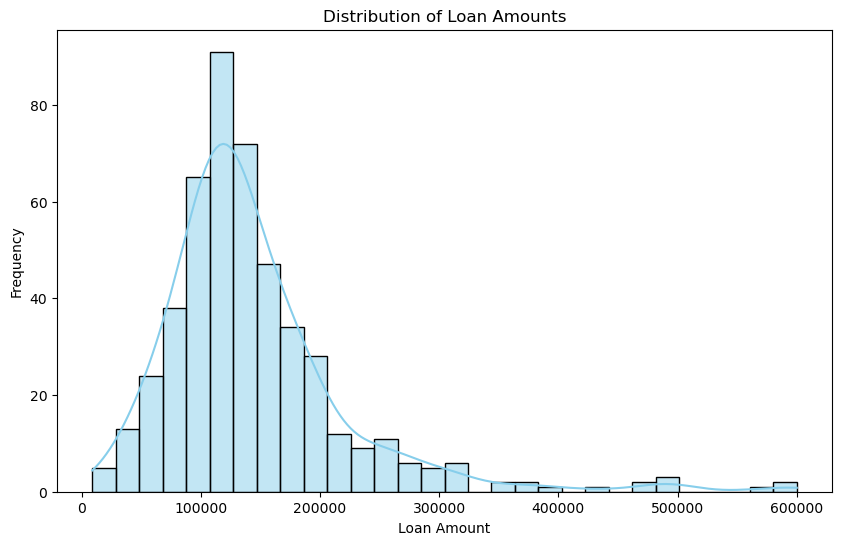

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named `df`
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


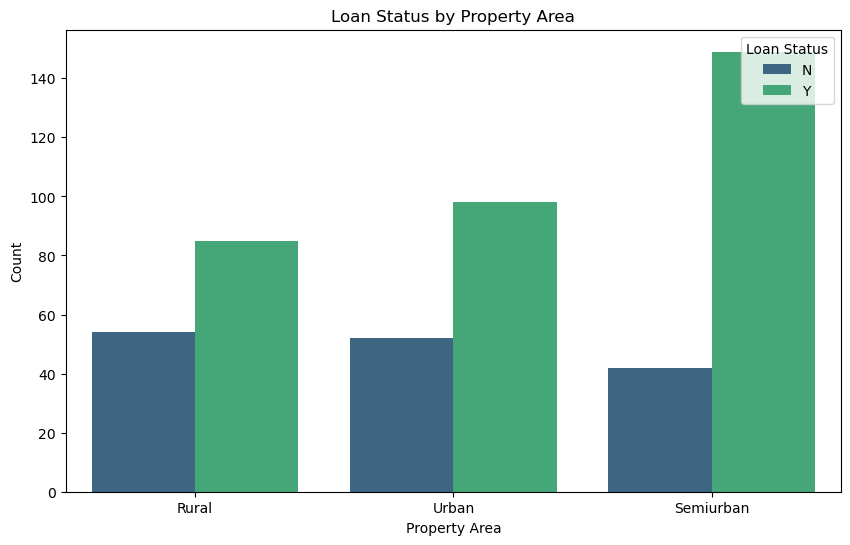

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Property_Area', hue='Loan_Status', palette='viridis')
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()


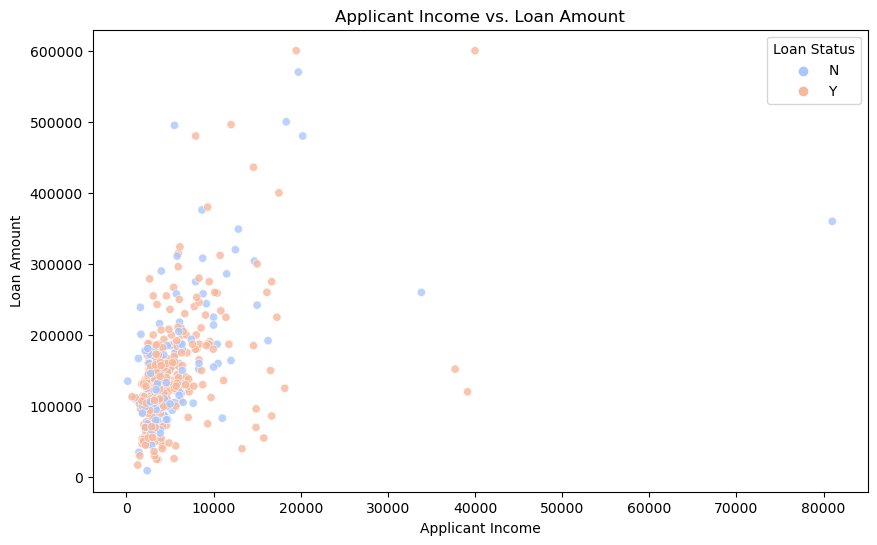

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', palette='coolwarm', alpha=0.8)
plt.title('Applicant Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right')
plt.show()


In [11]:
pre_y=df['Loan_Status']
pre_X=df.drop('Loan_Status', axis=1)


In [12]:
pre_X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71000,360.0,1.0,Rural
610,Male,Yes,3.0,Graduate,No,4106,0.0,40000,180.0,1.0,Rural
611,Male,Yes,1.0,Graduate,No,8072,240.0,253000,360.0,1.0,Urban
612,Male,Yes,2.0,Graduate,No,7583,0.0,187000,360.0,1.0,Urban


In [13]:
dm_X = pd.get_dummies(pre_X).astype(int) #We are using OneHotEncoding to work on the data so that the computer knows that it will work with numbers and not strings
dm_X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,4583,1508,128000,360,1,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0,66000,360,1,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358,120000,360,1,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0,141000,360,1,0,1,1,0,1,0,1,0,0,0,1
5,2,5417,4196,267000,360,1,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0,71000,360,1,1,0,1,0,1,0,1,0,1,0,0
610,3,4106,0,40000,180,1,0,1,0,1,1,0,1,0,1,0,0
611,1,8072,240,253000,360,1,0,1,0,1,1,0,1,0,0,0,1
612,2,7583,0,187000,360,1,0,1,0,1,1,0,1,0,0,0,1


In [14]:
dm_y = pre_y.map(dict(Y=1, N=0))#we are not using get dummies here because we want the values to be on one column
dm_y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [15]:
smote = SMOTE(sampling_strategy='minority')#we are using SMOTE as our sampling method to make the stuff balanced
X1, y = smote.fit_resample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [16]:
Counter(y)

Counter({0: 332, 1: 332})

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [18]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size=20, epochs=100, verbose=0)
eval_model = classifier.evaluate(X_train, y_train)
eval_model

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9092 - loss: 0.2707  


[0.26157158613204956, 0.9133710265159607]

In [19]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

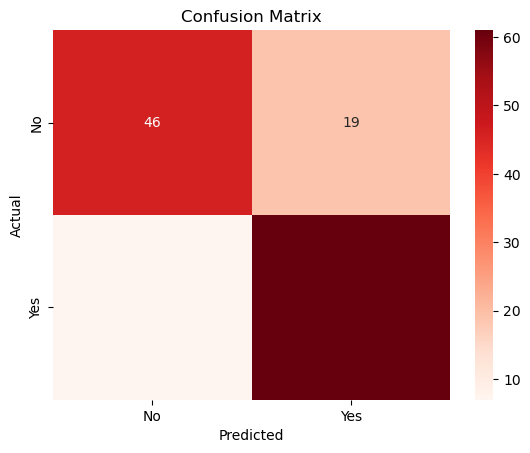

In [21]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Reds', cbar=True); #annot=True to annotate cells

#labels, title and ticks
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']); 
ax.yaxis.set_ticklabels(['No', 'Yes']); 
plt.show()

In [22]:
cm #for some reason the other numbers are not showing

array([[46, 19],
       [ 7, 61]], dtype=int64)

In [23]:
import pickle
import joblib
filename = 'loan_model.pkl'
joblib.dump(classifier, filename)

['loan_model.pkl']

In [24]:
X_test

array([[0.        , 0.05689549, 0.06894819, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.24217687, 0.15562845, ..., 1.        , 0.        ,
        0.        ],
       [0.66666667, 0.04745826, 0.04169991, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.0401979 , 0.07388362, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.05173779, 0.0724355 , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.05173779, 0.05352129, ..., 0.        , 0.        ,
        1.        ]])

In [25]:
test_df = pd.DataFrame(X_test, columns=dm_X.columns)

In [26]:
test_df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,0.056895,0.068948,0.204738,0.72973,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.242177,0.155628,0.949239,0.72973,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.666667,0.047458,0.041700,0.250423,0.72973,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.000000,0.043958,0.059107,0.187817,0.72973,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.000000,0.049845,0.068150,0.292724,0.72973,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.000000,0.038639,0.438987,0.134144,0.72973,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,0.000000,0.049202,0.000000,0.172734,0.72973,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
130,1.000000,0.040198,0.073884,0.192893,0.72973,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
131,0.000000,0.051738,0.072435,0.170897,0.72973,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [27]:
test_df.to_excel('test.xlsx', index=False)

In [28]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
scaler.fit(X)

# Save the scaler using joblib
joblib.dump(scaler, "scalers_real.pkl")

['scalers_real.pkl']

In [29]:
for col in df.columns:
    print (col)

Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


In [31]:
for col in dm_X.columns:
    print (col)

Dependents
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Gender_Female
Gender_Male
Married_No
Married_Yes
Education_Graduate
Education_Not Graduate
Self_Employed_No
Self_Employed_Yes
Property_Area_Rural
Property_Area_Semiurban
Property_Area_Urban
